<IPython.core.display.Javascript object>


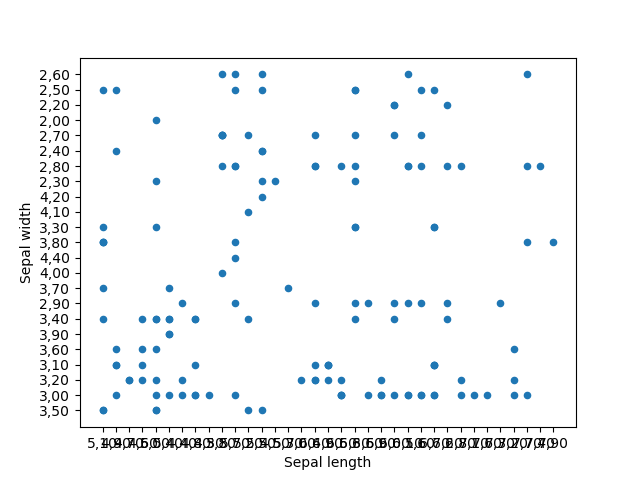

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Exercise meanshift
#1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
#2. get unique labels (Species column)
#3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
#![image.png](attachment:image.png)

iris_data = pd.read_csv('../data/iris_data.csv')

unique_labels = iris_data.Species.unique()
iris = iris_data.drop(['Petal length', 'Petal width', 'Species'], axis=1)
columns = iris.columns

ax1 = iris.plot.scatter(x=columns[0],

                      y=columns[1])

                     


In [37]:
#4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
#5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)


In [ ]:
#5. create a new scatter plot where each flower is colored according to cluster label
#6. add a dot for the cluster centers
#7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
#8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

Populating the interactive namespace from numpy and matplotlib
Number of estimated clusters : 3


<IPython.core.display.Javascript object>


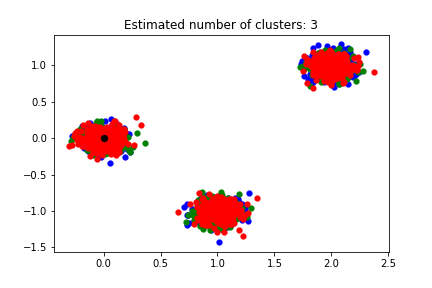

Text(0.5, 1.0, 'Estimated number of clusters: 3')

In [14]:
import pandas as pd
iris_data = pd.read_csv('../data/iris_data.csv')
iris = iris_data.drop(['Petal length', 'Petal width', 'Species'], axis=1)




%pylab inline 
from sklearn.cluster import MeanShift, estimate_bandwidth
# The bandwidth is the distance/size scale of the kernel function, i.e. 
# sklearn.cluster module offers an estimate_bandwith() function based on a nearest-neighbor analysis.
# quantile should be between [0, 1] 0.5 means that the median of all pairwise distances is used

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

%matplotlib notebook
# 2D data generated and meanshift used to find labels, cluster centers and amount of clusters
from itertools import cycle
from sklearn.datasets import make_blobs

centers = [[2, 1], [0, 0], [1, -1]] # centers are now 2-d
iris, _ = make_blobs(n_samples=2500, centers=centers, cluster_std=0.1)

labels, cluster_centers, n_clusters = mean_shift(iris)

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))